# Simulated Birfucation on a large scale

### Libraries

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

from models.simulated_bifurcation import simulated_bifurcation
#from charts import pie, table
#from csv_reader import csv_to_matrix
#from data.assets import assets

import pandas as pd
import numpy as np
import time
import bahc 

In [2]:
# Reading the CSV file, parsing dates
rets=pd.read_csv("russell1000.csv", parse_dates=True, index_col = 0)

# Defining the list of tickers from the DataFrame
tickers = [*rets.columns]

In [20]:
rets.head()

,A,AA,AAN,AAP,AAPL,ABC,ABT,ACGL,ACM,ACN,...,XEL,XL,XLNX,XOM,XRAY,XRX,Y,YUM,ZBRA,ZION
index,,,,,,,,,,,,,,,,,,,,,
2005-01-03 05:00:00+00:00,-0.009171,-0.013780,-0.013544,-0.002981,-0.016597,-0.009073,0.000429,-0.015625,NaN,-0.023610,...,-0.009939,-0.014921,-0.010851,-0.023089,-0.010014,-0.002354,0.002276,-0.007660,-0.015579,-0.009452
2005-01-04 05:00:00+00:00,-0.026736,-0.018236,-0.046520,-0.006681,0.009428,-0.007942,-0.010122,-0.013210,NaN,-0.023792,...,-0.015097,0.002350,-0.030814,-0.006811,-0.008121,-0.014841,-0.019068,-0.013331,-0.017110,-0.013746
2005-01-05 05:00:00+00:00,-0.000430,-0.005933,0.010422,0.001848,0.008720,-0.001909,-0.011538,-0.005868,NaN,-0.003891,...,-0.011332,-0.009566,-0.032157,-0.005240,-0.011847,-0.019934,-0.008917,-0.002384,-0.035504,-0.003617
2005-01-06 05:00:00+00:00,-0.022189,0.004288,-0.010422,-0.000923,0.000775,0.008474,0.022303,-0.001339,NaN,-0.009007,...,-0.001711,0.000658,-0.016106,0.012650,0.004756,-0.004280,-0.014456,0.011219,0.001521,0.005721
2005-01-07 05:00:00+00:00,-0.000880,0.010152,-0.042311,-0.005790,0.070283,-0.002932,0.016986,0.010393,NaN,0.045751,...,-0.005724,0.001184,0.008451,-0.006606,-0.007694,-0.005530,-0.003729,-0.005594,0.008511,-0.024621


In [4]:
rets.shape

(3397, 723)

In [5]:
len(tickers)

723

# Optimisation

In [6]:
alpha = 1  # num bits


T=250

dT=20

Nmax=50

t1s=np.arange(T,rets.shape[0],dT)

In [7]:
t1s

array([ 250,  270,  290,  310,  330,  350,  370,  390,  410,  430,  450,
        470,  490,  510,  530,  550,  570,  590,  610,  630,  650,  670,
        690,  710,  730,  750,  770,  790,  810,  830,  850,  870,  890,
        910,  930,  950,  970,  990, 1010, 1030, 1050, 1070, 1090, 1110,
       1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310, 1330,
       1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530, 1550,
       1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750, 1770,
       1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990,
       2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170, 2190, 2210,
       2230, 2250, 2270, 2290, 2310, 2330, 2350, 2370, 2390, 2410, 2430,
       2450, 2470, 2490, 2510, 2530, 2550, 2570, 2590, 2610, 2630, 2650,
       2670, 2690, 2710, 2730, 2750, 2770, 2790, 2810, 2830, 2850, 2870,
       2890, 2910, 2930, 2950, 2970, 2990, 3010, 3030, 3050, 3070, 3090,
       3110, 3130, 3150, 3170, 3190, 3210, 3230, 32

In [11]:
# Version François

start_time = time.time()


ptf=[] #This list stores each result dataframe from the simulationt
portfolio_returns = [] # Store portfolio returns
idx = 0 #Count interations
all_sel_cols=[] #?

for t1 in t1s:
    t0=t1-T
    t2 = t1+dT
    print('t0 :', t0)
    
    window = rets.iloc[t0:t2]
    
    window.dropna(axis = 1, inplace = True)
    
    tickers = list(window.columns) # This is the list of tickers we are considering before optimisation
    n_tickers = len(tickers) # Number of tickers before optimisation
        
    df_returns = rets.iloc[t0:t1] 
    df_returns = df_returns.loc[:, tickers]
    
    df_future_returns = rets.iloc[t1:t2]
    df_future_returns = df_future_returns.loc[:, tickers]

    print("There are {} tickers before Optimization".format(n_tickers))
    df_returns_values = df_returns.values #convert to numpy array
    

    
    # Computation of the covariance matrix
    sigma = bahc.filterCovariance(df_returns_values.T) #Why transpose ?
    
    
    # Computation of expected returns

    mu = df_returns.mean(axis=0)     # Sould we take compounded return instead?
    mu = np.expand_dims(mu, axis=1)
    print('Shape of mu :', mu.shape)
    print('Shape of sigma :', sigma.shape)
    
    
    
    # Creation of a simualted bifurcation class (Here it is not optimized yet)
    model = simulated_bifurcation(covariance = sigma, expected_return = mu, number_of_bits = alpha, assets_list = tickers)
    print('Shape of the Matrix for Binary tranformation :', model.matrix.shape)
    
    # Running Simulated Bifurcation
    model.optimize()
    
    result = model.portfolio['dataframe']
    
    ptf.append(result)
    
    # Computation of the weight
    w = result.loc[:, 'ratios'].values / 100
    
    # Tickers kept
    tickers_kept = list(result.loc[:, 'assets'])
    
    nb_assets_kept = (len(tickers_kept))
    print('Number of selected assets in the portfolio :', nb_assets_kept)
    
    
    proportion_of_asset_kepts = nb_assets_kept / sigma.shape[0]
    
    print('Proportion of assets kept : {} \n\n\n'.format(proportion_of_assets_kept))

    
    # Computation of the portfolio return
    expected_mu = np.array(df_future_returns.loc[:, tickers_kept].mean(axis = 0))
    
    portfolio_return = w @ expected_mu
    
    portfolio_returns.append(portfolio_return)



delta = time.time() - start_time

print('Full simulation took {:.2f} seconds to run'.format(delta))
    


t0 : 0
There are 48 tickers before Optimization
Shape of mu : (48, 1)
Shape of sigma : (48, 48)
Shape of the Matrix for Binary tranformation : (48, 48)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.766 seconds.
Number of selected assets in the portfolio : 15
t0 : 20
There are 46 tickers before Optimization
Shape of mu : (46, 1)
Shape of sigma : (46, 46)
Shape of the Matrix for Binary tranformation : (46, 46)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 2.021 seconds.
Number of selected assets in the portfolio : 17
t0 : 40
There are 55 tickers before Optimization
Shape of mu : (55, 1)
Shape of sigma : (55, 55)
Shape of the Matrix for Binary tranformation : (55, 55)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.954 seconds.
Number of selected assets in the portfolio : 15
t0 : 60
There are 56 tickers before Optimization
Shape of mu : (56, 1)
Shape of sigma : (56, 56)
Shape of the Matrix for Binary tranformation : (56, 56)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.698 seconds.
Number of selected assets in the portfolio : 17
t0 : 80
There are 53 tickers before Optimization
Shape of mu : (53, 1)
Shape of sigma : (53, 53)
Shape of the Matrix for Binary tranformation : (53, 53)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.665 seconds.
Number of selected assets in the portfolio : 21
t0 : 100
There are 58 tickers before Optimization
Shape of mu : (58, 1)
Shape of sigma : (58, 58)
Shape of the Matrix for Binary tranformation : (58, 58)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 2.226 seconds.
Number of selected assets in the portfolio : 15
t0 : 120
There are 63 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (63, 1)
Shape of sigma : (63, 63)
Shape of the Matrix for Binary tranformation : (63, 63)
Run in 1.721 seconds.
Number of selected assets in the portfolio : 13
t0 : 140
There are 68 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (68, 1)
Shape of sigma : (68, 68)
Shape of the Matrix for Binary tranformation : (68, 68)
Run in 2.041 seconds.
Number of selected assets in the portfolio : 10
t0 : 160
There are 67 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (67, 1)
Shape of sigma : (67, 67)
Shape of the Matrix for Binary tranformation : (67, 67)
Run in 1.82 seconds.
Number of selected assets in the portfolio : 12
t0 : 180
There are 70 tickers before Optimization
Shape of mu : (70, 1)
Shape of sigma : (70, 70)
Shape of the Matrix for Binary tranformation : (70, 70)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.956 seconds.
Number of selected assets in the portfolio : 16
t0 : 200
There are 65 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (65, 1)
Shape of sigma : (65, 65)
Shape of the Matrix for Binary tranformation : (65, 65)
Run in 3.276 seconds.
Number of selected assets in the portfolio : 15
t0 : 220
There are 64 tickers before Optimization
Shape of mu : (64, 1)
Shape of sigma : (64, 64)
Shape of the Matrix for Binary tranformation : (64, 64)


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run in 1.695 seconds.
Number of selected assets in the portfolio : 14
t0 : 240
There are 75 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (75, 1)
Shape of sigma : (75, 75)
Shape of the Matrix for Binary tranformation : (75, 75)
Run in 2.33 seconds.
Number of selected assets in the portfolio : 17
t0 : 260
There are 74 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (74, 1)
Shape of sigma : (74, 74)
Shape of the Matrix for Binary tranformation : (74, 74)
Run in 2.609 seconds.
Number of selected assets in the portfolio : 14
t0 : 280
There are 78 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (78, 1)
Shape of sigma : (78, 78)
Shape of the Matrix for Binary tranformation : (78, 78)
Run in 2.891 seconds.
Number of selected assets in the portfolio : 17
t0 : 300
There are 74 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (74, 1)
Shape of sigma : (74, 74)
Shape of the Matrix for Binary tranformation : (74, 74)
Run in 2.542 seconds.
Number of selected assets in the portfolio : 12
t0 : 320
There are 76 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (76, 1)
Shape of sigma : (76, 76)
Shape of the Matrix for Binary tranformation : (76, 76)
Run in 3.286 seconds.
Number of selected assets in the portfolio : 12
t0 : 340
There are 79 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (79, 1)
Shape of sigma : (79, 79)
Shape of the Matrix for Binary tranformation : (79, 79)
Run in 4.495 seconds.
Number of selected assets in the portfolio : 10
t0 : 360
There are 77 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (77, 1)
Shape of sigma : (77, 77)
Shape of the Matrix for Binary tranformation : (77, 77)
Run in 4.014 seconds.
Number of selected assets in the portfolio : 14
t0 : 380
There are 78 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (78, 1)
Shape of sigma : (78, 78)
Shape of the Matrix for Binary tranformation : (78, 78)
Run in 2.453 seconds.
Number of selected assets in the portfolio : 19
t0 : 400
There are 81 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (81, 1)
Shape of sigma : (81, 81)
Shape of the Matrix for Binary tranformation : (81, 81)
Run in 3.036 seconds.
Number of selected assets in the portfolio : 17
t0 : 420
There are 86 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (86, 1)
Shape of sigma : (86, 86)
Shape of the Matrix for Binary tranformation : (86, 86)
Run in 2.608 seconds.
Number of selected assets in the portfolio : 11
t0 : 440
There are 89 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (89, 1)
Shape of sigma : (89, 89)
Shape of the Matrix for Binary tranformation : (89, 89)
Run in 2.573 seconds.
Number of selected assets in the portfolio : 15
t0 : 460
There are 92 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (92, 1)
Shape of sigma : (92, 92)
Shape of the Matrix for Binary tranformation : (92, 92)
Run in 2.137 seconds.
Number of selected assets in the portfolio : 14
t0 : 480
There are 105 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (105, 1)
Shape of sigma : (105, 105)
Shape of the Matrix for Binary tranformation : (105, 105)
Run in 3.262 seconds.
Number of selected assets in the portfolio : 9
t0 : 500
There are 106 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (106, 1)
Shape of sigma : (106, 106)
Shape of the Matrix for Binary tranformation : (106, 106)
Run in 3.112 seconds.
Number of selected assets in the portfolio : 7
t0 : 520
There are 114 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (114, 1)
Shape of sigma : (114, 114)
Shape of the Matrix for Binary tranformation : (114, 114)
Run in 3.509 seconds.
Number of selected assets in the portfolio : 3
t0 : 540
There are 127 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (127, 1)
Shape of sigma : (127, 127)
Shape of the Matrix for Binary tranformation : (127, 127)
Run in 2.857 seconds.
Number of selected assets in the portfolio : 2
t0 : 560
There are 137 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (137, 1)
Shape of sigma : (137, 137)
Shape of the Matrix for Binary tranformation : (137, 137)
Run in 2.587 seconds.
Number of selected assets in the portfolio : 1
t0 : 580
There are 147 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (147, 1)
Shape of sigma : (147, 147)
Shape of the Matrix for Binary tranformation : (147, 147)
Run in 3.096 seconds.
Number of selected assets in the portfolio : 1
t0 : 600
There are 150 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (150, 1)
Shape of sigma : (150, 150)
Shape of the Matrix for Binary tranformation : (150, 150)
Run in 2.574 seconds.
Number of selected assets in the portfolio : 1
t0 : 620
There are 157 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (157, 1)
Shape of sigma : (157, 157)
Shape of the Matrix for Binary tranformation : (157, 157)
Run in 2.645 seconds.
Number of selected assets in the portfolio : 1
t0 : 640
There are 164 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (164, 1)
Shape of sigma : (164, 164)
Shape of the Matrix for Binary tranformation : (164, 164)
Run in 2.499 seconds.
Number of selected assets in the portfolio : 2
t0 : 660
There are 160 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (160, 1)
Shape of sigma : (160, 160)
Shape of the Matrix for Binary tranformation : (160, 160)
Run in 2.625 seconds.
Number of selected assets in the portfolio : 0
t0 : 680
There are 168 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (168, 1)
Shape of sigma : (168, 168)
Shape of the Matrix for Binary tranformation : (168, 168)
Run in 2.726 seconds.
Number of selected assets in the portfolio : 0
t0 : 700
There are 175 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (175, 1)
Shape of sigma : (175, 175)
Shape of the Matrix for Binary tranformation : (175, 175)
Run in 2.166 seconds.
Number of selected assets in the portfolio : 0
t0 : 720
There are 183 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (183, 1)
Shape of sigma : (183, 183)
Shape of the Matrix for Binary tranformation : (183, 183)
Run in 2.812 seconds.
Number of selected assets in the portfolio : 0
t0 : 740
There are 193 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (193, 1)
Shape of sigma : (193, 193)
Shape of the Matrix for Binary tranformation : (193, 193)
Run in 2.445 seconds.
Number of selected assets in the portfolio : 0
t0 : 760
There are 195 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (195, 1)
Shape of sigma : (195, 195)
Shape of the Matrix for Binary tranformation : (195, 195)
Run in 2.675 seconds.
Number of selected assets in the portfolio : 0
t0 : 780
There are 183 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (183, 1)
Shape of sigma : (183, 183)
Shape of the Matrix for Binary tranformation : (183, 183)
Run in 2.577 seconds.
Number of selected assets in the portfolio : 0
t0 : 800
There are 177 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (177, 1)
Shape of sigma : (177, 177)
Shape of the Matrix for Binary tranformation : (177, 177)
Run in 2.08 seconds.
Number of selected assets in the portfolio : 0
t0 : 820
There are 180 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (180, 1)
Shape of sigma : (180, 180)
Shape of the Matrix for Binary tranformation : (180, 180)
Run in 2.447 seconds.
Number of selected assets in the portfolio : 0
t0 : 840
There are 188 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (188, 1)
Shape of sigma : (188, 188)
Shape of the Matrix for Binary tranformation : (188, 188)
Run in 2.258 seconds.
Number of selected assets in the portfolio : 0
t0 : 860
There are 188 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (188, 1)
Shape of sigma : (188, 188)
Shape of the Matrix for Binary tranformation : (188, 188)
Run in 2.027 seconds.
Number of selected assets in the portfolio : 0
t0 : 880
There are 179 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (179, 1)
Shape of sigma : (179, 179)
Shape of the Matrix for Binary tranformation : (179, 179)
Run in 2.086 seconds.
Number of selected assets in the portfolio : 0
t0 : 900
There are 184 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (184, 1)
Shape of sigma : (184, 184)
Shape of the Matrix for Binary tranformation : (184, 184)
Run in 2.216 seconds.
Number of selected assets in the portfolio : 0
t0 : 920
There are 178 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (178, 1)
Shape of sigma : (178, 178)
Shape of the Matrix for Binary tranformation : (178, 178)
Run in 2.21 seconds.
Number of selected assets in the portfolio : 0
t0 : 940
There are 157 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (157, 1)
Shape of sigma : (157, 157)
Shape of the Matrix for Binary tranformation : (157, 157)
Run in 2.298 seconds.
Number of selected assets in the portfolio : 0
t0 : 960
There are 143 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (143, 1)
Shape of sigma : (143, 143)
Shape of the Matrix for Binary tranformation : (143, 143)
Run in 2.208 seconds.
Number of selected assets in the portfolio : 0
t0 : 980
There are 131 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (131, 1)
Shape of sigma : (131, 131)
Shape of the Matrix for Binary tranformation : (131, 131)
Run in 2.051 seconds.
Number of selected assets in the portfolio : 0
t0 : 1000
There are 114 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (114, 1)
Shape of sigma : (114, 114)
Shape of the Matrix for Binary tranformation : (114, 114)
Run in 1.819 seconds.
Number of selected assets in the portfolio : 0
t0 : 1020
There are 114 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (114, 1)
Shape of sigma : (114, 114)
Shape of the Matrix for Binary tranformation : (114, 114)
Run in 2.195 seconds.
Number of selected assets in the portfolio : 0
t0 : 1040
There are 108 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (108, 1)
Shape of sigma : (108, 108)
Shape of the Matrix for Binary tranformation : (108, 108)
Run in 2.784 seconds.
Number of selected assets in the portfolio : 1
t0 : 1060
There are 99 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (99, 1)
Shape of sigma : (99, 99)
Shape of the Matrix for Binary tranformation : (99, 99)
Run in 1.883 seconds.
Number of selected assets in the portfolio : 10
t0 : 1080
There are 98 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (98, 1)
Shape of sigma : (98, 98)
Shape of the Matrix for Binary tranformation : (98, 98)
Run in 1.963 seconds.
Number of selected assets in the portfolio : 10
t0 : 1100
There are 101 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (101, 1)
Shape of sigma : (101, 101)
Shape of the Matrix for Binary tranformation : (101, 101)
Run in 2.354 seconds.
Number of selected assets in the portfolio : 8
t0 : 1120
There are 100 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (100, 1)
Shape of sigma : (100, 100)
Shape of the Matrix for Binary tranformation : (100, 100)
Run in 1.965 seconds.
Number of selected assets in the portfolio : 5
t0 : 1140
There are 102 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (102, 1)
Shape of sigma : (102, 102)
Shape of the Matrix for Binary tranformation : (102, 102)
Run in 2.06 seconds.
Number of selected assets in the portfolio : 2
t0 : 1160
There are 93 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (93, 1)
Shape of sigma : (93, 93)
Shape of the Matrix for Binary tranformation : (93, 93)
Run in 2.008 seconds.
Number of selected assets in the portfolio : 2
t0 : 1180
There are 91 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (91, 1)
Shape of sigma : (91, 91)
Shape of the Matrix for Binary tranformation : (91, 91)
Run in 3.411 seconds.
Number of selected assets in the portfolio : 2
t0 : 1200
There are 87 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (87, 1)
Shape of sigma : (87, 87)
Shape of the Matrix for Binary tranformation : (87, 87)
Run in 2.247 seconds.
Number of selected assets in the portfolio : 3
t0 : 1220
There are 84 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (84, 1)
Shape of sigma : (84, 84)
Shape of the Matrix for Binary tranformation : (84, 84)
Run in 2.06 seconds.
Number of selected assets in the portfolio : 6
t0 : 1240
There are 83 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (83, 1)
Shape of sigma : (83, 83)
Shape of the Matrix for Binary tranformation : (83, 83)
Run in 2.431 seconds.
Number of selected assets in the portfolio : 5
t0 : 1260
There are 93 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (93, 1)
Shape of sigma : (93, 93)
Shape of the Matrix for Binary tranformation : (93, 93)
Run in 2.413 seconds.
Number of selected assets in the portfolio : 3
t0 : 1280
There are 97 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (97, 1)
Shape of sigma : (97, 97)
Shape of the Matrix for Binary tranformation : (97, 97)
Run in 2.249 seconds.
Number of selected assets in the portfolio : 5
t0 : 1300
There are 96 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (96, 1)
Shape of sigma : (96, 96)
Shape of the Matrix for Binary tranformation : (96, 96)
Run in 2.702 seconds.
Number of selected assets in the portfolio : 3
t0 : 1320
There are 91 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (91, 1)
Shape of sigma : (91, 91)
Shape of the Matrix for Binary tranformation : (91, 91)
Run in 3.231 seconds.
Number of selected assets in the portfolio : 4
t0 : 1340
There are 92 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (92, 1)
Shape of sigma : (92, 92)
Shape of the Matrix for Binary tranformation : (92, 92)
Run in 3.036 seconds.
Number of selected assets in the portfolio : 4
t0 : 1360
There are 86 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (86, 1)
Shape of sigma : (86, 86)
Shape of the Matrix for Binary tranformation : (86, 86)
Run in 4.36 seconds.
Number of selected assets in the portfolio : 7
t0 : 1380
There are 89 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (89, 1)
Shape of sigma : (89, 89)
Shape of the Matrix for Binary tranformation : (89, 89)
Run in 4.218 seconds.
Number of selected assets in the portfolio : 10
t0 : 1400
There are 97 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (97, 1)
Shape of sigma : (97, 97)
Shape of the Matrix for Binary tranformation : (97, 97)
Run in 3.169 seconds.
Number of selected assets in the portfolio : 12
t0 : 1420
There are 112 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (112, 1)
Shape of sigma : (112, 112)
Shape of the Matrix for Binary tranformation : (112, 112)
Run in 4.667 seconds.
Number of selected assets in the portfolio : 1
t0 : 1440
There are 119 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (119, 1)
Shape of sigma : (119, 119)
Shape of the Matrix for Binary tranformation : (119, 119)
Run in 4.668 seconds.
Number of selected assets in the portfolio : 0
t0 : 1460
There are 126 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (126, 1)
Shape of sigma : (126, 126)
Shape of the Matrix for Binary tranformation : (126, 126)
Run in 3.254 seconds.
Number of selected assets in the portfolio : 1
t0 : 1480
There are 138 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (138, 1)
Shape of sigma : (138, 138)
Shape of the Matrix for Binary tranformation : (138, 138)
Run in 2.989 seconds.
Number of selected assets in the portfolio : 1
t0 : 1500
There are 142 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (142, 1)
Shape of sigma : (142, 142)
Shape of the Matrix for Binary tranformation : (142, 142)
Run in 5.772 seconds.
Number of selected assets in the portfolio : 0
t0 : 1520
There are 147 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (147, 1)
Shape of sigma : (147, 147)
Shape of the Matrix for Binary tranformation : (147, 147)
Run in 3.499 seconds.
Number of selected assets in the portfolio : 1
t0 : 1540
There are 154 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (154, 1)
Shape of sigma : (154, 154)
Shape of the Matrix for Binary tranformation : (154, 154)
Run in 4.488 seconds.
Number of selected assets in the portfolio : 2
t0 : 1560
There are 139 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (139, 1)
Shape of sigma : (139, 139)
Shape of the Matrix for Binary tranformation : (139, 139)
Run in 9.896 seconds.
Number of selected assets in the portfolio : 1
t0 : 1580
There are 143 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (143, 1)
Shape of sigma : (143, 143)
Shape of the Matrix for Binary tranformation : (143, 143)
Run in 5.034 seconds.
Number of selected assets in the portfolio : 1
t0 : 1600
There are 153 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (153, 1)
Shape of sigma : (153, 153)
Shape of the Matrix for Binary tranformation : (153, 153)
Run in 4.517 seconds.
Number of selected assets in the portfolio : 1
t0 : 1620
There are 156 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (156, 1)
Shape of sigma : (156, 156)
Shape of the Matrix for Binary tranformation : (156, 156)
Run in 4.213 seconds.
Number of selected assets in the portfolio : 0
t0 : 1640
There are 136 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (136, 1)
Shape of sigma : (136, 136)
Shape of the Matrix for Binary tranformation : (136, 136)
Run in 3.25 seconds.
Number of selected assets in the portfolio : 0
t0 : 1660
There are 122 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (122, 1)
Shape of sigma : (122, 122)
Shape of the Matrix for Binary tranformation : (122, 122)
Run in 4.213 seconds.
Number of selected assets in the portfolio : 2
t0 : 1680
There are 119 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (119, 1)
Shape of sigma : (119, 119)
Shape of the Matrix for Binary tranformation : (119, 119)
Run in 3.105 seconds.
Number of selected assets in the portfolio : 5
t0 : 1700
There are 114 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (114, 1)
Shape of sigma : (114, 114)
Shape of the Matrix for Binary tranformation : (114, 114)
Run in 2.656 seconds.
Number of selected assets in the portfolio : 8
t0 : 1720
There are 111 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (111, 1)
Shape of sigma : (111, 111)
Shape of the Matrix for Binary tranformation : (111, 111)
Run in 6.415 seconds.
Number of selected assets in the portfolio : 7
t0 : 1740
There are 98 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (98, 1)
Shape of sigma : (98, 98)
Shape of the Matrix for Binary tranformation : (98, 98)
Run in 2.893 seconds.
Number of selected assets in the portfolio : 15
t0 : 1760
There are 90 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (90, 1)
Shape of sigma : (90, 90)
Shape of the Matrix for Binary tranformation : (90, 90)
Run in 3.495 seconds.
Number of selected assets in the portfolio : 15
t0 : 1780
There are 97 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (97, 1)
Shape of sigma : (97, 97)
Shape of the Matrix for Binary tranformation : (97, 97)
Run in 2.216 seconds.
Number of selected assets in the portfolio : 19
t0 : 1800
There are 96 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (96, 1)
Shape of sigma : (96, 96)
Shape of the Matrix for Binary tranformation : (96, 96)
Run in 3.174 seconds.
Number of selected assets in the portfolio : 13
t0 : 1820
There are 97 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (97, 1)
Shape of sigma : (97, 97)
Shape of the Matrix for Binary tranformation : (97, 97)
Run in 4.757 seconds.
Number of selected assets in the portfolio : 13
t0 : 1840
There are 98 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (98, 1)
Shape of sigma : (98, 98)
Shape of the Matrix for Binary tranformation : (98, 98)
Run in 4.139 seconds.
Number of selected assets in the portfolio : 14
t0 : 1860
There are 95 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (95, 1)
Shape of sigma : (95, 95)
Shape of the Matrix for Binary tranformation : (95, 95)
Run in 3.721 seconds.
Number of selected assets in the portfolio : 19
t0 : 1880
There are 94 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (94, 1)
Shape of sigma : (94, 94)
Shape of the Matrix for Binary tranformation : (94, 94)
Run in 3.394 seconds.
Number of selected assets in the portfolio : 16
t0 : 1900
There are 91 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (91, 1)
Shape of sigma : (91, 91)
Shape of the Matrix for Binary tranformation : (91, 91)
Run in 2.697 seconds.
Number of selected assets in the portfolio : 18
t0 : 1920
There are 92 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (92, 1)
Shape of sigma : (92, 92)
Shape of the Matrix for Binary tranformation : (92, 92)
Run in 2.762 seconds.
Number of selected assets in the portfolio : 21
t0 : 1940
There are 98 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (98, 1)
Shape of sigma : (98, 98)
Shape of the Matrix for Binary tranformation : (98, 98)
Run in 4.919 seconds.
Number of selected assets in the portfolio : 17
t0 : 1960
There are 102 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (102, 1)
Shape of sigma : (102, 102)
Shape of the Matrix for Binary tranformation : (102, 102)
Run in 3.977 seconds.
Number of selected assets in the portfolio : 20
t0 : 1980
There are 96 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (96, 1)
Shape of sigma : (96, 96)
Shape of the Matrix for Binary tranformation : (96, 96)
Run in 3.117 seconds.
Number of selected assets in the portfolio : 24
t0 : 2000
There are 93 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (93, 1)
Shape of sigma : (93, 93)
Shape of the Matrix for Binary tranformation : (93, 93)
Run in 2.278 seconds.
Number of selected assets in the portfolio : 27
t0 : 2020
There are 95 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (95, 1)
Shape of sigma : (95, 95)
Shape of the Matrix for Binary tranformation : (95, 95)
Run in 2.21 seconds.
Number of selected assets in the portfolio : 26
t0 : 2040
There are 108 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (108, 1)
Shape of sigma : (108, 108)
Shape of the Matrix for Binary tranformation : (108, 108)
Run in 2.878 seconds.
Number of selected assets in the portfolio : 16
t0 : 2060
There are 118 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (118, 1)
Shape of sigma : (118, 118)
Shape of the Matrix for Binary tranformation : (118, 118)
Run in 3.937 seconds.
Number of selected assets in the portfolio : 17
t0 : 2080
There are 121 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (121, 1)
Shape of sigma : (121, 121)
Shape of the Matrix for Binary tranformation : (121, 121)
Run in 2.818 seconds.
Number of selected assets in the portfolio : 15
t0 : 2100
There are 119 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (119, 1)
Shape of sigma : (119, 119)
Shape of the Matrix for Binary tranformation : (119, 119)
Run in 3.772 seconds.
Number of selected assets in the portfolio : 9
t0 : 2120
There are 110 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (110, 1)
Shape of sigma : (110, 110)
Shape of the Matrix for Binary tranformation : (110, 110)
Run in 6.245 seconds.
Number of selected assets in the portfolio : 16
t0 : 2140
There are 110 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (110, 1)
Shape of sigma : (110, 110)
Shape of the Matrix for Binary tranformation : (110, 110)
Run in 3.278 seconds.
Number of selected assets in the portfolio : 22
t0 : 2160
There are 107 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (107, 1)
Shape of sigma : (107, 107)
Shape of the Matrix for Binary tranformation : (107, 107)
Run in 2.916 seconds.
Number of selected assets in the portfolio : 17
t0 : 2180
There are 101 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (101, 1)
Shape of sigma : (101, 101)
Shape of the Matrix for Binary tranformation : (101, 101)
Run in 2.071 seconds.
Number of selected assets in the portfolio : 23
t0 : 2200
There are 102 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (102, 1)
Shape of sigma : (102, 102)
Shape of the Matrix for Binary tranformation : (102, 102)
Run in 3.568 seconds.
Number of selected assets in the portfolio : 17
t0 : 2220
There are 93 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (93, 1)
Shape of sigma : (93, 93)
Shape of the Matrix for Binary tranformation : (93, 93)
Run in 2.693 seconds.
Number of selected assets in the portfolio : 13
t0 : 2240
There are 101 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (101, 1)
Shape of sigma : (101, 101)
Shape of the Matrix for Binary tranformation : (101, 101)
Run in 2.56 seconds.
Number of selected assets in the portfolio : 17
t0 : 2260
There are 102 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (102, 1)
Shape of sigma : (102, 102)
Shape of the Matrix for Binary tranformation : (102, 102)
Run in 2.986 seconds.
Number of selected assets in the portfolio : 19
t0 : 2280
There are 105 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (105, 1)
Shape of sigma : (105, 105)
Shape of the Matrix for Binary tranformation : (105, 105)
Run in 2.856 seconds.
Number of selected assets in the portfolio : 17
t0 : 2300
There are 104 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (104, 1)
Shape of sigma : (104, 104)
Shape of the Matrix for Binary tranformation : (104, 104)
Run in 2.148 seconds.
Number of selected assets in the portfolio : 18
t0 : 2320
There are 115 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (115, 1)
Shape of sigma : (115, 115)
Shape of the Matrix for Binary tranformation : (115, 115)
Run in 2.229 seconds.
Number of selected assets in the portfolio : 17
t0 : 2340
There are 114 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (114, 1)
Shape of sigma : (114, 114)
Shape of the Matrix for Binary tranformation : (114, 114)
Run in 3.354 seconds.
Number of selected assets in the portfolio : 16
t0 : 2360
There are 113 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (113, 1)
Shape of sigma : (113, 113)
Shape of the Matrix for Binary tranformation : (113, 113)
Run in 3.064 seconds.
Number of selected assets in the portfolio : 15
t0 : 2380
There are 120 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (120, 1)
Shape of sigma : (120, 120)
Shape of the Matrix for Binary tranformation : (120, 120)
Run in 2.134 seconds.
Number of selected assets in the portfolio : 14
t0 : 2400
There are 126 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (126, 1)
Shape of sigma : (126, 126)
Shape of the Matrix for Binary tranformation : (126, 126)
Run in 2.242 seconds.
Number of selected assets in the portfolio : 14
t0 : 2420
There are 134 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (134, 1)
Shape of sigma : (134, 134)
Shape of the Matrix for Binary tranformation : (134, 134)
Run in 2.776 seconds.
Number of selected assets in the portfolio : 14
t0 : 2440
There are 136 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (136, 1)
Shape of sigma : (136, 136)
Shape of the Matrix for Binary tranformation : (136, 136)
Run in 3.366 seconds.
Number of selected assets in the portfolio : 5
t0 : 2460
There are 142 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (142, 1)
Shape of sigma : (142, 142)
Shape of the Matrix for Binary tranformation : (142, 142)
Run in 3.6 seconds.
Number of selected assets in the portfolio : 4
t0 : 2480
There are 146 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (146, 1)
Shape of sigma : (146, 146)
Shape of the Matrix for Binary tranformation : (146, 146)
Run in 3.615 seconds.
Number of selected assets in the portfolio : 5
t0 : 2500
There are 153 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (153, 1)
Shape of sigma : (153, 153)
Shape of the Matrix for Binary tranformation : (153, 153)
Run in 3.296 seconds.
Number of selected assets in the portfolio : 4
t0 : 2520
There are 153 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (153, 1)
Shape of sigma : (153, 153)
Shape of the Matrix for Binary tranformation : (153, 153)
Run in 3.914 seconds.
Number of selected assets in the portfolio : 2
t0 : 2540
There are 155 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (155, 1)
Shape of sigma : (155, 155)
Shape of the Matrix for Binary tranformation : (155, 155)
Run in 2.915 seconds.
Number of selected assets in the portfolio : 0
t0 : 2560
There are 159 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (159, 1)
Shape of sigma : (159, 159)
Shape of the Matrix for Binary tranformation : (159, 159)
Run in 2.987 seconds.
Number of selected assets in the portfolio : 0
t0 : 2580
There are 162 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (162, 1)
Shape of sigma : (162, 162)
Shape of the Matrix for Binary tranformation : (162, 162)
Run in 3.42 seconds.
Number of selected assets in the portfolio : 1
t0 : 2600
There are 171 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (171, 1)
Shape of sigma : (171, 171)
Shape of the Matrix for Binary tranformation : (171, 171)
Run in 3.429 seconds.
Number of selected assets in the portfolio : 0
t0 : 2620
There are 168 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (168, 1)
Shape of sigma : (168, 168)
Shape of the Matrix for Binary tranformation : (168, 168)
Run in 3.228 seconds.
Number of selected assets in the portfolio : 0
t0 : 2640
There are 169 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (169, 1)
Shape of sigma : (169, 169)
Shape of the Matrix for Binary tranformation : (169, 169)
Run in 3.519 seconds.
Number of selected assets in the portfolio : 2
t0 : 2660
There are 165 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (165, 1)
Shape of sigma : (165, 165)
Shape of the Matrix for Binary tranformation : (165, 165)
Run in 2.901 seconds.
Number of selected assets in the portfolio : 4
t0 : 2680
There are 165 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (165, 1)
Shape of sigma : (165, 165)
Shape of the Matrix for Binary tranformation : (165, 165)
Run in 3.459 seconds.
Number of selected assets in the portfolio : 10
t0 : 2700
There are 162 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (162, 1)
Shape of sigma : (162, 162)
Shape of the Matrix for Binary tranformation : (162, 162)
Run in 3.958 seconds.
Number of selected assets in the portfolio : 6
t0 : 2720
There are 153 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (153, 1)
Shape of sigma : (153, 153)
Shape of the Matrix for Binary tranformation : (153, 153)
Run in 2.756 seconds.
Number of selected assets in the portfolio : 7
t0 : 2740
There are 146 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (146, 1)
Shape of sigma : (146, 146)
Shape of the Matrix for Binary tranformation : (146, 146)
Run in 3.239 seconds.
Number of selected assets in the portfolio : 4
t0 : 2760
There are 148 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (148, 1)
Shape of sigma : (148, 148)
Shape of the Matrix for Binary tranformation : (148, 148)
Run in 2.67 seconds.
Number of selected assets in the portfolio : 6
t0 : 2780
There are 147 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (147, 1)
Shape of sigma : (147, 147)
Shape of the Matrix for Binary tranformation : (147, 147)
Run in 3.174 seconds.
Number of selected assets in the portfolio : 12
t0 : 2800
There are 138 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (138, 1)
Shape of sigma : (138, 138)
Shape of the Matrix for Binary tranformation : (138, 138)
Run in 3.186 seconds.
Number of selected assets in the portfolio : 15
t0 : 2820
There are 123 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (123, 1)
Shape of sigma : (123, 123)
Shape of the Matrix for Binary tranformation : (123, 123)
Run in 2.896 seconds.
Number of selected assets in the portfolio : 19
t0 : 2840
There are 117 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (117, 1)
Shape of sigma : (117, 117)
Shape of the Matrix for Binary tranformation : (117, 117)
Run in 3.197 seconds.
Number of selected assets in the portfolio : 20
t0 : 2860
There are 122 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (122, 1)
Shape of sigma : (122, 122)
Shape of the Matrix for Binary tranformation : (122, 122)
Run in 2.285 seconds.
Number of selected assets in the portfolio : 22
t0 : 2880
There are 123 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (123, 1)
Shape of sigma : (123, 123)
Shape of the Matrix for Binary tranformation : (123, 123)
Run in 2.403 seconds.
Number of selected assets in the portfolio : 28
t0 : 2900
There are 121 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (121, 1)
Shape of sigma : (121, 121)
Shape of the Matrix for Binary tranformation : (121, 121)
Run in 2.752 seconds.
Number of selected assets in the portfolio : 34
t0 : 2920
There are 123 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (123, 1)
Shape of sigma : (123, 123)
Shape of the Matrix for Binary tranformation : (123, 123)
Run in 2.43 seconds.
Number of selected assets in the portfolio : 35
t0 : 2940
There are 123 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (123, 1)
Shape of sigma : (123, 123)
Shape of the Matrix for Binary tranformation : (123, 123)
Run in 3.249 seconds.
Number of selected assets in the portfolio : 29
t0 : 2960
There are 128 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (128, 1)
Shape of sigma : (128, 128)
Shape of the Matrix for Binary tranformation : (128, 128)
Run in 5.441 seconds.
Number of selected assets in the portfolio : 41
t0 : 2980
There are 131 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (131, 1)
Shape of sigma : (131, 131)
Shape of the Matrix for Binary tranformation : (131, 131)
Run in 3.42 seconds.
Number of selected assets in the portfolio : 53
t0 : 3000
There are 131 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (131, 1)
Shape of sigma : (131, 131)
Shape of the Matrix for Binary tranformation : (131, 131)
Run in 7.723 seconds.
Number of selected assets in the portfolio : 57
t0 : 3020
There are 131 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (131, 1)
Shape of sigma : (131, 131)
Shape of the Matrix for Binary tranformation : (131, 131)
Run in 2.118 seconds.
Number of selected assets in the portfolio : 55
t0 : 3040
There are 130 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (130, 1)
Shape of sigma : (130, 130)
Shape of the Matrix for Binary tranformation : (130, 130)
Run in 3.229 seconds.
Number of selected assets in the portfolio : 60
t0 : 3060
There are 134 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (134, 1)
Shape of sigma : (134, 134)
Shape of the Matrix for Binary tranformation : (134, 134)
Run in 3.999 seconds.
Number of selected assets in the portfolio : 28
t0 : 3080
There are 142 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (142, 1)
Shape of sigma : (142, 142)
Shape of the Matrix for Binary tranformation : (142, 142)
Run in 3.972 seconds.
Number of selected assets in the portfolio : 25
t0 : 3100
There are 149 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (149, 1)
Shape of sigma : (149, 149)
Shape of the Matrix for Binary tranformation : (149, 149)
Run in 4.193 seconds.
Number of selected assets in the portfolio : 17
t0 : 3120
There are 145 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (145, 1)
Shape of sigma : (145, 145)
Shape of the Matrix for Binary tranformation : (145, 145)
Run in 3.933 seconds.
Number of selected assets in the portfolio : 18
t0 : 3140
There are 156 tickers before Optimization


<ipython-input-11-e06b9047c178>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of mu : (156, 1)
Shape of sigma : (156, 156)
Shape of the Matrix for Binary tranformation : (156, 156)
Run in 4.154 seconds.
Number of selected assets in the portfolio : 18
Full simulation took 559.63 seconds to run


In [18]:
ptf[0]

,assets,stocks,ratios
0,AAPL,1.0,6.667
1,AET,1.0,6.667
2,BTU,1.0,6.667
3,CI,1.0,6.667
4,CME,1.0,6.667
5,GOOG,1.0,6.667
6,GPN,1.0,6.667
7,HP,1.0,6.667
8,ITRI,1.0,6.667
9,LM,1.0,6.667


# Backtests

In [12]:
# Defining the portfolio returns

portfolio_returns = [r + 1 for r in portfolio_returns]
portfolio_returns

[1.002482034297846,
 0.9983651530327712,
 0.9999387824615896,
 1.0025505955221152,
 0.9939318472835076,
 0.9994657645481833,
 1.0005061348886672,
 1.0002682220995187,
 1.0011860765512641,
 1.002603382087657,
 1.0008700116355294,
 1.0026535292191083,
 1.0015294373675638,
 1.0016676631110044,
 0.9980375934711989,
 1.001580288143838,
 0.9993242682643979,
 0.9996949435149983,
 0.9998604554405286,
 0.9965374773943635,
 0.9996506817656235,
 1.0046664502083344,
 1.0026506793403989,
 0.9960759299192989,
 1.006330271124251,
 0.9925745622548432,
 1.0033560490823352,
 0.994798525937305,
 0.9993170304410391,
 0.997889722223835,
 1.0008733846520195,
 1.003973584347926,
 0.9979293729572858,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0010934294857436,
 1.0017238113524651,
 0.9997986532844965,
 0.9987823587834621,
 0.9979640324408505,
 0.9996571205023773,
 1.0006652151449578,
 1.0030526739601588,
 1.0017452462426297,
 1.00428414

No handles with labels found to put in legend.


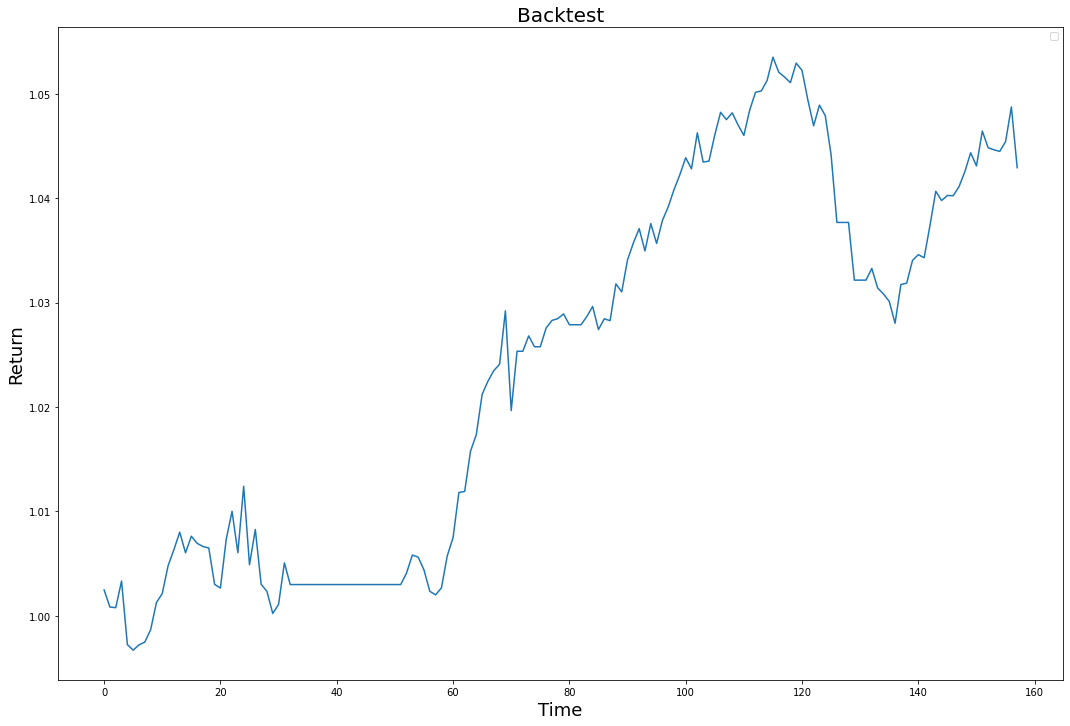

In [16]:
plt.figure(figsize = (18,12))
plt.title('Backtest', fontsize = 20)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.legend()
plt.plot(np.cumprod(portfolio_returns))
plt.show()

Hi 
 Hi
